In [1]:
import jax.numpy as jnp
import jax.random
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\julie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\julie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


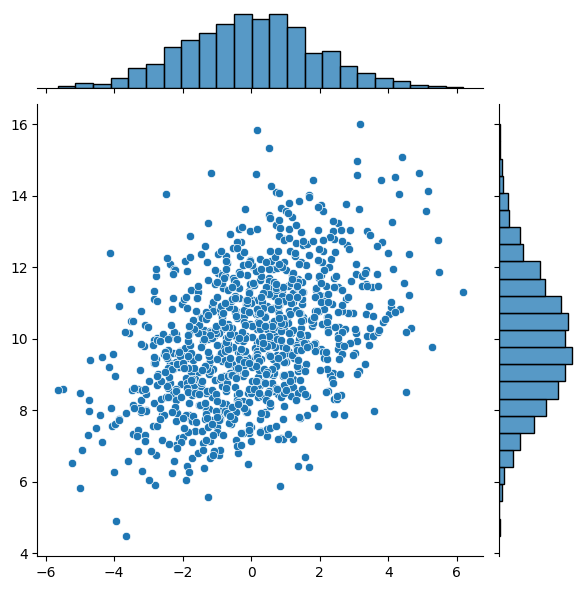

In [2]:
key = jax.random.key(0)
N = 1000
# Genrate a corolated 2D dataset with corlated cooridnates
X = jax.random.multivariate_normal(key, jnp.array([0, 10]), jnp.array([[4, 0.9], [2, 3]]), (N,))

sns.jointplot(x=X[:, 0], y=X[:, 1], kind="scatter")
plt.show()


In [4]:
from distributions.marginal import Quantile, Normal, Mixture
from distributions.copula import Histogram, GaussianMixture
from distributions.joint import Independent, Gaussian, CopulaBased
from distributions.util import log_likelihood

In [5]:
import time

def test_model(model, name, data):
    print(f"Testing {name}")
    start = time.time()
    model.fit(X)
    print(f"Log likelihood: {log_likelihood(model, data)}")
    print(f"Number of parameters: {model.get_nb_params()}")
    print(f"Time: {time.time() - start}")
    print("")

In [6]:
test_model(Independent([
    Mixture([Normal(), Normal()]), 
    Normal()
]),"", X)

Testing 
Log likelihood: -8.508794784545898
Number of parameters: 6
Time: 2.517303228378296



In [6]:
test_model(Independent([Normal(), Normal()]),"Independent model log likelihood", X)
test_model(Gaussian(2), "Gaussian model log likelihood", X)
test_model(CopulaBased(GaussianMixture(2,5),[Quantile(), Quantile()]), "Copula (gaussian) model log likelihood", X)
test_model(CopulaBased(Histogram(2,20),[Quantile(), Quantile()]), "Copula (histogram) model log likelihood", X)

Testing Independent model log likelihood
Log likelihood: -4.080008029937744
Number of parameters: 4
Time: 0.01685357093811035

Testing Gaussian model log likelihood
Log likelihood: -3.973630666732788
Number of parameters: 6
Time: 0.00748753547668457

Testing Copula (gaussian) model log likelihood
Log likelihood: -4.051547527313232
Number of parameters: 435
Time: 7.90590763092041

Testing Copula (histogram) model log likelihood
Log likelihood: -3.9571590423583984
Number of parameters: 842
Time: 2.284419298171997

